In [2]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(42)

# Gaussian process with one features

Why it is multivariate Gaussian?
different samples are considered different variables.
they are likely correlated with each other, the kernel helps generate similar y when x is similar.

why it is multivariate gaussian of functions?
the mean and covariance is defined by m(x) and K(x, x')

in the inference phase, the prediction is considered as an conditional distribution problem.
Given x, y and new x, the distribution of new y.

the samples are considered as variables, the mean and covariance of the variables define the Gaussian distribution of functions.
New data points are considered as conditional distribution with respect to x,y and new x.
The kernel function makes sure samples close in x will lead to similar y. joint normal distribution.

Gaussian processes, prior defined by mean and covariance (kernel function), posterior defined by prior and training data.
Gaussian processes regression is basically conditional distribution of multivariate. Basically update mean and covariance using training data.

Each sample is considered a variable, therefore there could be infinite variables.

the relationship between x and y. y is sampled from a multivariate normal distribution, this distribution is defined by x. a prior distribution is assumed, and training data is used to update the distribution.

In [4]:
# 1D simulation of the Brownian motion process, a stochastic process

total_time = 1
nb_steps = 75
delta_t = total_time / nb_steps
nb_processes = 5
mean = 0. # mean distance for sampling
stdev = np.sqrt(delta_t)  # std for distance sampling

distances = np.cumsum(
    np.random.normal(
        mean, stdev, (nb_processes, nb_steps)
    ),
    axis=1
)

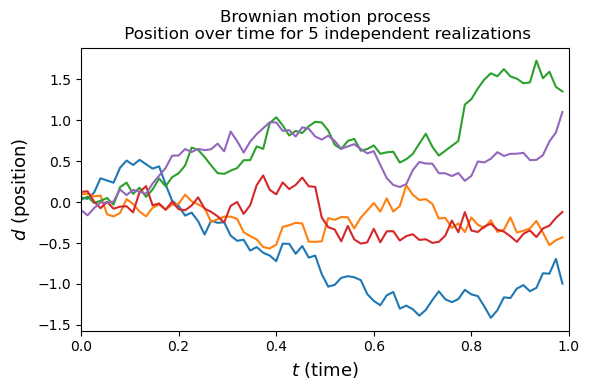

In [7]:
plt.figure(figsize=(6, 4))
# Make the plots
t = np.arange(0, total_time, delta_t)
for i in range(nb_processes):
    plt.plot(t, distances[i,:])
plt.title((
    'Brownian motion process\n '
    'Position over time for 5 independent realizations'))
plt.xlabel('$t$ (time)', fontsize=13)
plt.ylabel('$d$ (position)', fontsize=13)
plt.xlim([-0, 1])
plt.tight_layout()

In [38]:
# Covariance function as prior

# define the exponentiated quadratic (RBF)
def exponentiated_quadratic(xa, xb):
    """Exponentiated quadratic with sigma=1"""
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')

    return np.exp(sq_norm)

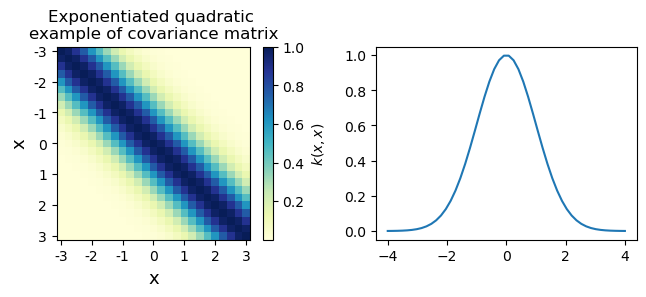

In [40]:
# illustrate covariance matrix and function

fig, ax = plt.subplots(1, 2, figsize=(7, 3))
xlim = (-3, 3)
X = np.expand_dims(np.linspace(*xlim, 25), 1)
K = exponentiated_quadratic(X, X)

# plot covariance matrix
im = ax[0].imshow(K, cmap='YlGnBu')
cbar = plt.colorbar(
    im, ax=ax[0], fraction=0.045, pad=0.05)
cbar.ax.set_ylabel('$k(x,x)$', fontsize=10)
ax[0].set_title((
    'Exponentiated quadratic \n'
    'example of covariance matrix'))
ax[0].set_xlabel('x', fontsize=13)
ax[0].set_ylabel('x', fontsize=13)
ticks = list(range(xlim[0], xlim[1]+1))
ax[0].set_xticks(np.linspace(0, len(X)-1, len(ticks)))
ax[0].set_yticks(np.linspace(0, len(X)-1, len(ticks)))
ax[0].set_xticklabels(ticks)
ax[0].set_yticklabels(ticks)
ax[0].grid(False)

# show covariance with X = 0
xlim = (-4, 4)
X = np.expand_dims(np.linspace(*xlim, num=50), 1)
zero = np.array([[0]])
K0 = exponentiated_quadratic(X, zero)
ax[1].plot(X[:,0], K0[:,0], label='$k(x,0)$')

fig.tight_layout()

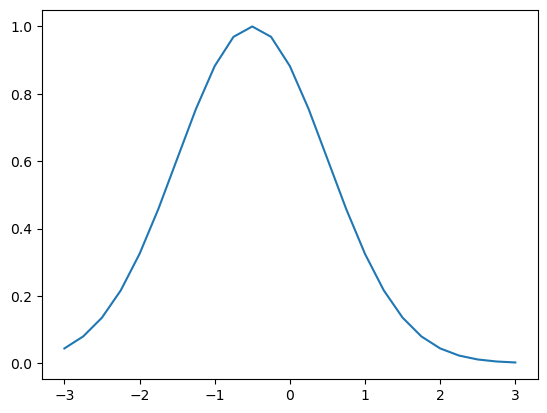

In [26]:
plt.plot(X[:, 0], K[0:, 10])

In [52]:
# Sampling from prior

# consider Y, and X

# sample from the gaussian process distribution
nb_of_samples = 41  # number of data points, number of dimensions
nb_of_functions = 5  # number of 

# independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
K = exponentiated_quadratic(X, X)  # kernel of the points

# draw samples from the prior at our data points.
# y is sampled from a multivariate normal distribution, the 'variate' is the different values of a features 
# sample from multivariate normal distribution, mean has the dimension (D) of the variable (number of samples), cov is D x D, size, to indicate how many groups of variables to sample.
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=K, size=nb_of_functions
)

(-4.0, 4.0)

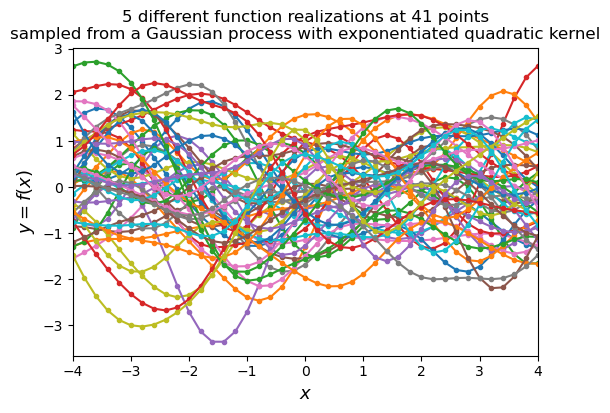

In [33]:
# Plot the sampled functions
plt.figure(figsize=(6, 4))
for i in range(nb_of_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title((
    '5 different function realizations at 41 points\n'
    'sampled from a Gaussian process with exponentiated quadratic kernel'))
plt.xlim([-4, 4])

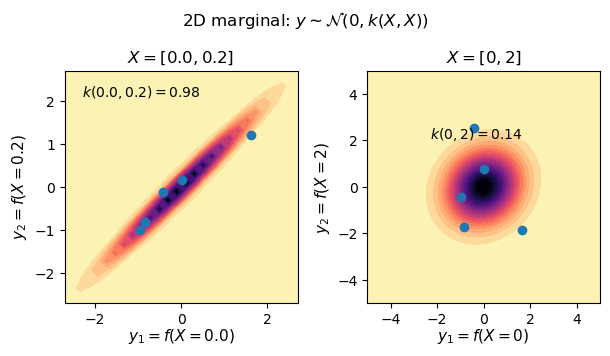

In [87]:
# Show marginal 2D Gaussian

def generate_surface(mean, covariance, surface_resolution):
    """function to generate density surface"""
    x1s = np.linspace(-5, 5, num=surface_resolution)
    x2s = np.linspace(-5, 5, num=surface_resolution)
    x1, x2 = np.meshgrid(x1s, x2s)
    pdf = np.zeros((surface_resolution, surface_resolution))

    # fill the matrix for each combination of weights
    for i in range(surface_resolution):
        for j in range(surface_resolution):
            pdf[i, j] = scipy.stats.multivariate_normal.pdf(
                np.array([x1[i, j], x2[i, j]]),
                mean=mean, cov=covariance
            )
    
    return x1, x2, pdf

surface_resolution = 50
fig, ax = plt.subplots(1, 2, figsize=(6.2, 3.5))

# plot of strong correlation
X_strong = np.array([[0.], [0.2]])
mu = np.array([0., 0.])
K_strong = exponentiated_quadratic(X_strong, X_strong)
x1, x2, p = generate_surface(mu, K_strong, surface_resolution)
ax[0].contourf(x1, x2, p, 25, cmap='magma_r')
ax[0].set_xlabel(
    f'$y_1 = f(X={X_strong[0,0]})$', 
    fontsize=11, labelpad=0)
ax[0].set_ylabel(
    f'$y_2 = f(X={X_strong[1,0]})$', 
    fontsize=11)
ax[0].axis([-2.7, 2.7, -2.7, 2.7])
ax[0].set_aspect('equal')
ax[0].text(
    -2.3, 2.1, 
    (f'$k({X_strong[0,0]}, {X_strong[1,0]}) '
     f'= {K_strong[0,1]:.2f}$'), 
    fontsize=10)
ax[0].set_title(
    f'$X = [{X_strong[0,0]}, {X_strong[1,0]}]$ ', 
    fontsize=12)
# select samples
X_0_index = np.where(np.isclose(X, 0.))
X_02_index = np.where(np.isclose(X, 0.2))
y_strong = ys[:, [X_0_index[0][0], X_02_index[0][0]]]
# plot bivariate distribution
ax[0].scatter(y_strong[:, 0], y_strong[:, 1], marker='o')

# plot of weak correlation
X_weak = np.array([[0], [2]])
mu = np.array([0., 0.])
K_weak = exponentiated_quadratic(X_weak, X_weak)
y1, y2, p = generate_surface(mu, K_weak, surface_resolution=surface_resolution)
# Plot bivariate distribution
ax[1].contourf(x1, x2, p, 25, cmap='magma_r')
ax[1].set_xlabel(
    f'$y_1 = f(X={X_weak[0,0]})$', 
    fontsize=11, labelpad=0)
ax[1].set_ylabel(
    f'$y_2 = f(X={X_weak[1,0]})$', 
    fontsize=11)
ax[1].set_aspect('equal')
ax[1].text(
    -2.3, 2.1, 
    (f'$k({X_weak[0,0]}, {X_weak[1,0]}) '
     f'= {K_weak[0,1]:.2f}$'), 
    fontsize=10)
ax[1].set_title(
    f'$X = [{X_weak[0,0]}, {X_weak[1,0]}]$', 
    fontsize=12)
# Add colorbar
# cbar = plt.colorbar(con1, ax=ax[1], cax=cax)
# cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=11)
fig.suptitle('2D marginal: $y \sim \mathcal{N}(0, k(X, X))$')
# Select samples
X_0_index = np.where(np.isclose(X, 0.))
X_2_index = np.where(np.isclose(X, 2.))
y_weak = ys[:,[X_0_index[0][0], X_2_index[0][0]]]
# Show samples on surface
ax[1].scatter(y_weak[:, 0], y_weak[:, 1], marker='o')

plt.tight_layout()


In [85]:
print(y_strong[:, 0])
print(y_strong[:, 1])

[-0.41195928  0.01471453 -0.95223213 -0.83021189  1.62692913]
[-0.1275117   0.15575049 -0.99236017 -0.8160302   1.20743584]


In [95]:
# Gaussian process posterior
# equations can be found here: https://peterroelants.github.io/posts/gaussian-process-tutorial/

def gp_post(X1, y1, X2, kernel_func):
    """calculate the posterior mean and covariance matrix for y2 based on the corresponding input
    X2, the observations (y1, X1), and the prior kernel function

    Args:
        X1 (_type_): _description_
        y1 (_type_): _description_
        X2 (_type_): _description_
        kernel_func (_type_): _description_
    """

    # kernel of the observations
    K11 = kernel_func(X1, X1)

    # kerne of the observations vs prediction data
    K12 = kernel_func(X1, X2)

    # compute posterior mean
    K11_inv = np.linalg.inv(K11)
    mu2 = (K11_inv @ K12).T @ y1
    
    # compute posterior covariance
    K22 = kernel_func(X2, X2)
    K2 = K22 - (K11_inv @ K12).T @ K12

    return mu2, K2

In [104]:
# Example with a sine function

# define the true function
f_sin = lambda x: (np.sin(x)).flatten()

n1 = 8 # number of points/samples to condition on (training point)
n2 = 75  # number of points in posterior (test points)
ny = 5  # number of functions that will be sampled from the posterior
domain = (-6, 6)

# sample observations (X1, y1) on the function
X1 = np.random.uniform(domain[0] + 2, domain[1] - 2, size=(n1, 1))
y1 = f_sin(X1)
# predict points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1, 1)
# compute posterior mean and covariance
mu2, K2 = gp_post(X1, y1, X2, exponentiated_quadratic)

# compute the standard deviation at the test points to be plotted
sigma2 = np.sqrt(np.diag(K2))

# draw some functions from the posterior
y2 = np.random.multivariate_normal(mean=mu2, cov=K2, size=ny)

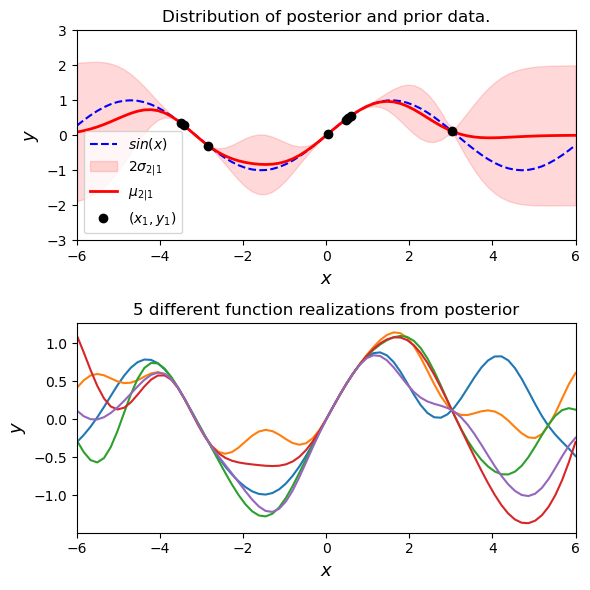

In [116]:
# Plot the posterior distribution and some samples
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))

# Plot the distribution of the function (mean, covariance)
ax[0].plot(X2, f_sin(X2), 'b--', label='$sin(x)$')  # the true function
ax[0].fill_between(X2.flat, mu2-2*sigma2, mu2+2*sigma2, color='red', 
    alpha=0.15, label='$2 \sigma_{2|1}$')  # the prediction interval 2 * std
ax[0].plot(X2, mu2, 'r-', lw=2, label='$\mu_{2|1}$')  # the mean function
ax[0].plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')  # the training data points
ax[0].set_xlabel('$x$', fontsize=13)
ax[0].set_ylabel('$y$', fontsize=13)
ax[0].set_title('Distribution of posterior and prior data.')
ax[0].axis([domain[0], domain[1], -3, 3])
ax[0].legend()

# plot some functions from this the Gaussian process
ax[1].plot(X2, y2.T, '-')
ax[1].set_xlabel('$x$', fontsize=13)
ax[1].set_ylabel('$y$', fontsize=13)
ax[1].set_title('5 different function realizations from posterior')
ax[1].set_xlim([-6, 6])
plt.tight_layout()

(5, 75)